Assignment 3
<br> Hotaling, Michael
<br> 2020-09-13
<br> 
### Exersize 3: Test Scores
Importing the data. If you've forked or cloned this repo, you should be able to run the code with no issues

In [1]:
setwd("..")
setwd("..")
test_scores <- read.csv("data/scores.csv")

#### 1. What are the observational units in this study?
<br> The observational units in this study would be the two different sections that the teacher taught; 
<br> One unit with a sports focused applications (Sports) and 
<br> One unit with a variety of applications (Regular)


#### 2. Identify the variables mentioned in the narrative paragraph and determine which are categorical and quantitative?
The dataframe contains three variables.
<br> The first observation is `Count` which is a **quantitative** variable. After discussing it with a classmate, we established that count is the number of students that achieved the score in the `Score` column. 
<br> The second obseravation is `Score`, another **quantiative** variable which is the test scores from each group
<br> The third observation is `Section`, a **categorical** variable which tells us which scores are associated with which class
<br>
<br> We can see the variables below using `str()` and `summary()`
<br> We can also inspect the data structure by using `head()` and `tail()`

In [2]:
str(test_scores)
summary(test_scores)
head(test_scores)
tail(test_scores)

'data.frame':	38 obs. of  3 variables:
 $ Count  : int  10 10 20 10 10 10 10 30 10 10 ...
 $ Score  : int  200 205 235 240 250 265 275 285 295 300 ...
 $ Section: Factor w/ 2 levels "Regular","Sports": 2 2 2 2 2 1 1 2 1 1 ...


     Count           Score          Section  
 Min.   :10.00   Min.   :200.0   Regular:19  
 1st Qu.:10.00   1st Qu.:300.0   Sports :19  
 Median :10.00   Median :322.5               
 Mean   :14.47   Mean   :317.5               
 3rd Qu.:20.00   3rd Qu.:357.5               
 Max.   :30.00   Max.   :395.0               

,Count,Score,Section
,<int>,<int>,<fct>
1,10,200,Sports
2,10,205,Sports
3,20,235,Sports
4,10,240,Sports
5,10,250,Sports
6,10,265,Regular


,Count,Score,Section
,<int>,<int>,<fct>
33,10,370,Sports
34,10,370,Regular
35,20,375,Regular
36,10,375,Sports
37,20,380,Regular
38,10,395,Sports


To allow for more easier data manipulation, I'll ungroup the data based on the `Count` column. This will create a unique row for each student

In [3]:
v <- do.call("c", (mapply(rep, c(test_scores$Score, test_scores$Section), test_scores$Count)))

df <- t(matrix(v, 2, byrow=T))

colnames(df) <- c("Score","Section")
df <- as.data.frame(df)

section_changer <- function(section){
  if (section == "1"){
    return("Regular")
  }
  else{
    return("Sport")
  }
}


df$Section <- apply(df[,2, drop=F], 1, section_changer)
df$Section <- as.factor(df$Section)

summary(df)
str(df)

     Score          Section   
 Min.   :200.0   Regular:290  
 1st Qu.:300.0   Sport  :260  
 Median :330.0                
 Mean   :321.7                
 3rd Qu.:360.0                
 Max.   :395.0                

'data.frame':	550 obs. of  2 variables:
 $ Score  : int  200 200 200 200 200 200 200 200 200 200 ...
 $ Section: Factor w/ 2 levels "Regular","Sport": 2 2 2 2 2 2 2 2 2 2 ...


#### 3. Create one variable to hold a subset of your data set that contains only the Regular Section and one variable for the Sports Section.

In [4]:
regular_students <- subset(df, Section == "Regular")
sports_students <- subset(df, !Section == "Regular")


summary(regular_students)
summary(sports_students)

     Score        Section   
 Min.   :265   Regular:290  
 1st Qu.:320   Sport  :  0  
 Median :335                
 Mean   :335                
 3rd Qu.:360                
 Max.   :380                

     Score          Section   
 Min.   :200.0   Regular:  0  
 1st Qu.:285.0   Sport  :260  
 Median :312.5                
 Mean   :306.9                
 3rd Qu.:340.0                
 Max.   :395.0                

#### 4. Use the Plot function to plot each Sections scores and the number of students achieving that score. <br>Use additional Plot Arguments to label the graph and give each axis an appropriate label. <br>Once you have produced your Plots answer the following questions:

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"Removed 4 rows containing missing values (geom_bar)."

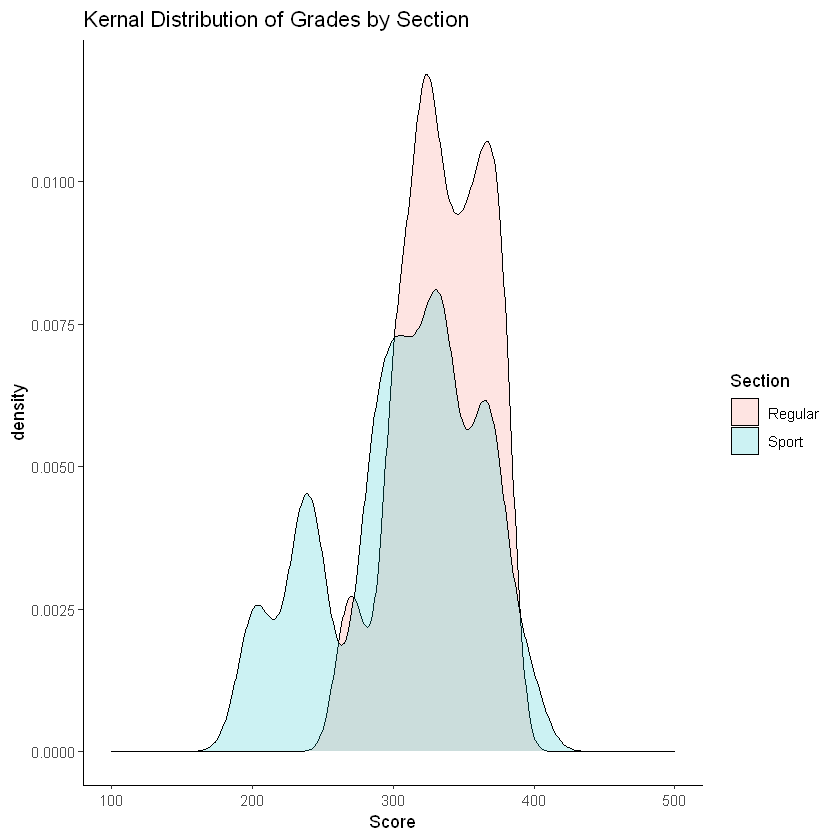

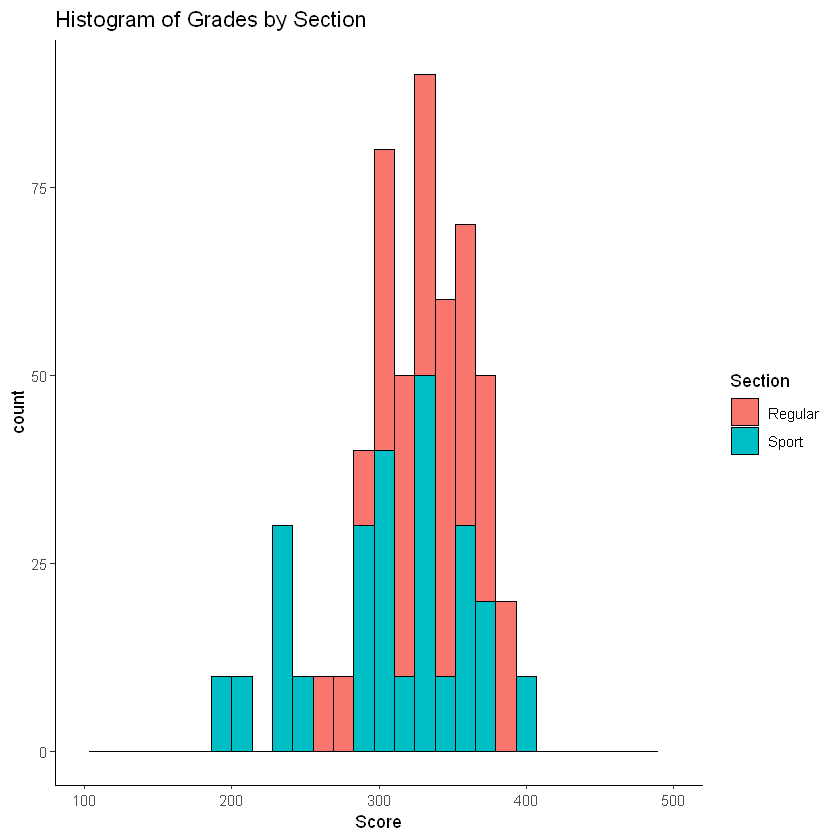

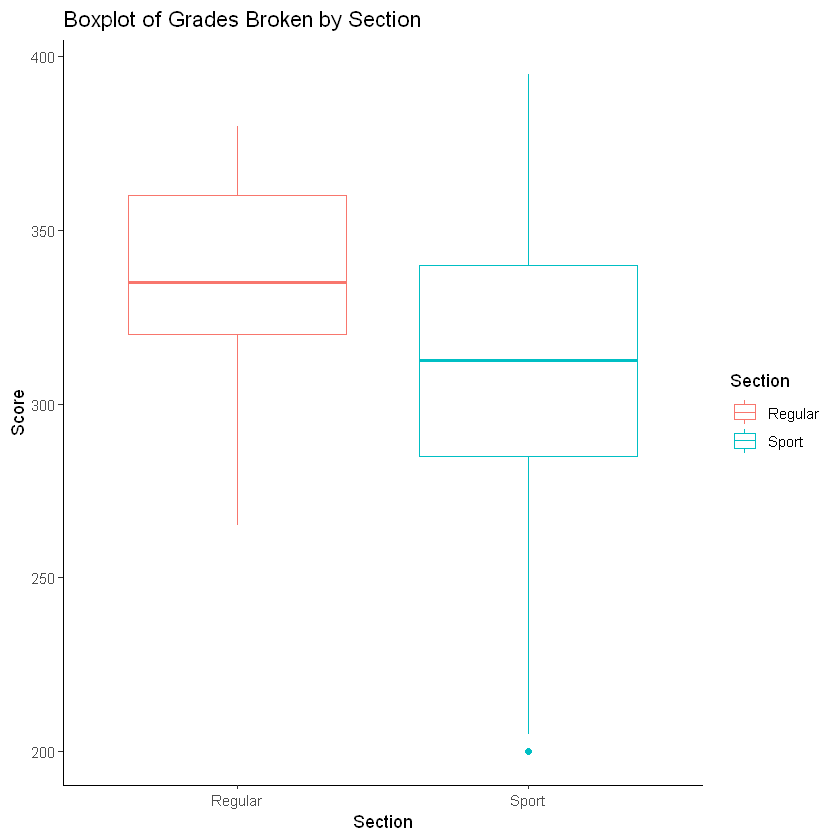

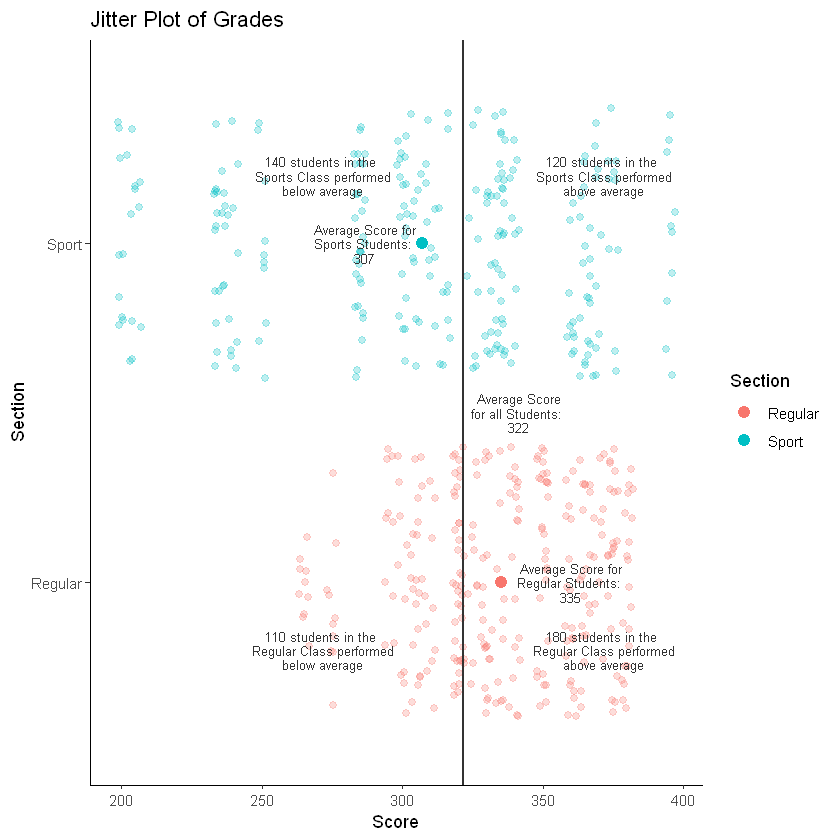

In [5]:
library(ggplot2)
library(dplyr)
set.seed(520) # Setting seed for reproducibility

theme_set(theme_classic())

average_test_score <- df %>% summarize(avg = mean(Score)) %>% pull(avg)
sports_test_score <- sports_students %>% summarize(avg = mean(Score)) %>% pull(avg)
regular_test_score <- regular_students %>% summarize(avg = mean(Score)) %>% pull(avg)


sports_low_scores <- as.numeric(count(subset(sports_students, Score < average_test_score)))
regular_low_scores <- as.numeric(count(subset(regular_students, Score < average_test_score)))

sports_high_scores <- as.numeric(count(subset(sports_students, Score > average_test_score)))
regular_high_scores <- as.numeric(count(subset(regular_students, Score > average_test_score)))


ggplot(data = df, aes(x = Score, fill = Section)) + 
geom_density(alpha = 0.2) + 
xlim(100,500) + 
ggtitle("Kernal Distribution of Grades by Section")


ggplot(data = df, aes(x = Score, fill = Section)) + 
geom_histogram(bins = 30, color = "black") + 
xlim(100,500) +
ggtitle("Histogram of Grades by Section")


ggplot(data = df, aes(x = Section, y = Score)) + 
geom_boxplot(aes(color = Section)) +
ggtitle("Boxplot of Grades Broken by Section")

ggplot(data = df, aes(x = Section, y = Score)) + 
geom_segment(aes(x = Section, xend = Section, y = mean(Score) , yend = average_test_score), size = 2) +
geom_jitter(size =2, alpha = 0.25, width = 0.4, aes(color = Section)) +
stat_summary(fun = mean, geom = "point", size = 3, aes(color = Section)) +
geom_hline(aes(yintercept = average_test_score), color = "gray20", size = 0.6) +
coord_flip() + 
annotate("text", x = 1.5, y = average_test_score + 20, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("Average Score\n for all Students: \n {round(average_test_score)}")) + 
annotate("text", x = 2, y = sports_test_score - 20, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("Average Score for\n Sports Students: \n {round(sports_test_score)}")) + 
annotate("text", x = 1, y = regular_test_score + 25, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("Average Score for\n Regular Students: \n {round(regular_test_score)}")) + 
annotate("text", x = 2.2, y = average_test_score - 50, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("{round(sports_low_scores)} students in the \n Sports Class performed \nbelow average")) +
annotate("text", x = 2.2, y = average_test_score + 50, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("{round(sports_high_scores)} students in the \n Sports Class performed \nabove average")) +
annotate("text", x = 0.8, y = average_test_score - 50, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("{round(regular_low_scores)} students in the \n Regular Class performed \nbelow average")) +
annotate("text", x = 0.8, y = average_test_score + 50, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("{round(regular_high_scores)} students in the \n Regular Class performed \nabove average")) +
ggtitle("Jitter Plot of Grades")

#### 4a. Comparing and contrasting the point distributions between the two section, looking at both tendency and consistency: Can you say that one section tended to score more points than the other? Justify and explain your answer.


In [6]:
median(sports_students$Score) > median(regular_students$Score)
mean(sports_students$Score) > mean(regular_students$Score)

[1] FALSE

[1] FALSE


Students in the sports section tend to, on average, score lower than the students in the regular class. However, there is a larger distribution of scores in the sports class, indicating less consistency. Having access to more data would be ideal in order for us to draw a more conclusive result

#### 4b. Did every student in one section score more points than every student in the other section? If not, explain what a statistical tendency means in this context.

Definitely not. In fact, the highest score achieved by all the students was a achieved by several students in the sports section.  Many students from the sports class outperformed students from the regular class. Statistical tendency in this case uses the average and median scores to compare the students from each class. Students in the sports class can still achieve better scores than students in the regular class, but it is less likely to happen statistically

#### 4c. What could be one additional variable that was not mentioned in the narrative that could be influencing the point distributions between the two sections?

The sports group has about 5 clusters of students that didn't perform very well which is causing the average score to drop for the class. If we exclude those students from the group as outliers, we can see that the grades from both sections are almost perfectly matched. 

     Score          Section   
 Min.   :295.0   Regular:250  
 1st Qu.:320.0   Sport  :  0  
 Median :335.0                
 Mean   :336.6                
 3rd Qu.:360.0                
 Max.   :375.0                

     Score          Section   
 Min.   :300.0   Regular:  0  
 1st Qu.:313.8   Sport  :160  
 Median :335.0                
 Mean   :335.3                
 3rd Qu.:361.2                
 Max.   :375.0                

Warning message:
"Removed 4 rows containing missing values (geom_bar)."

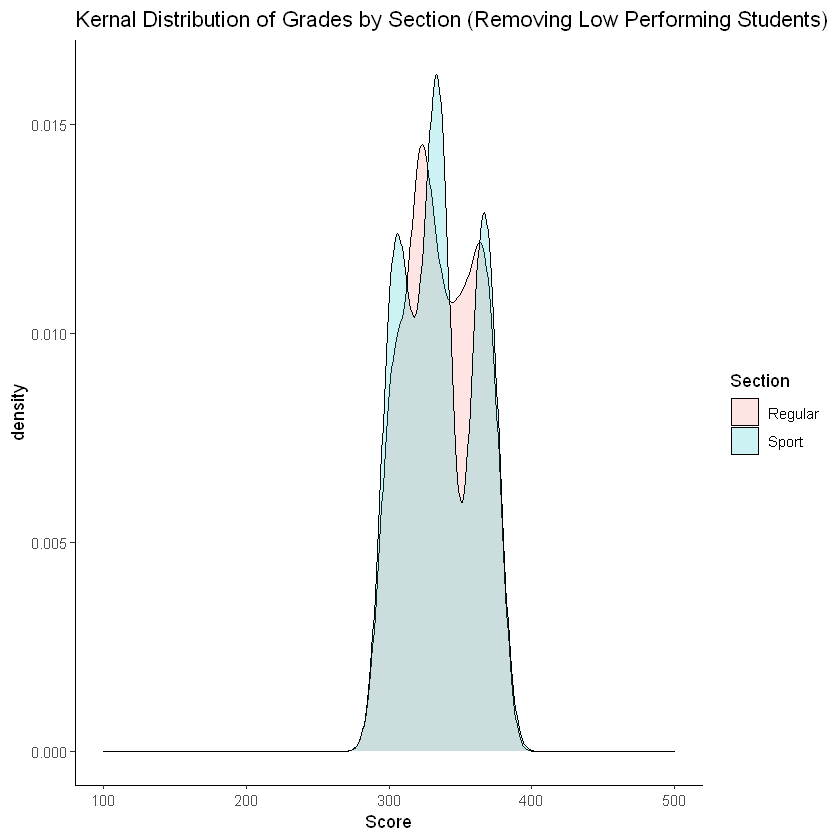

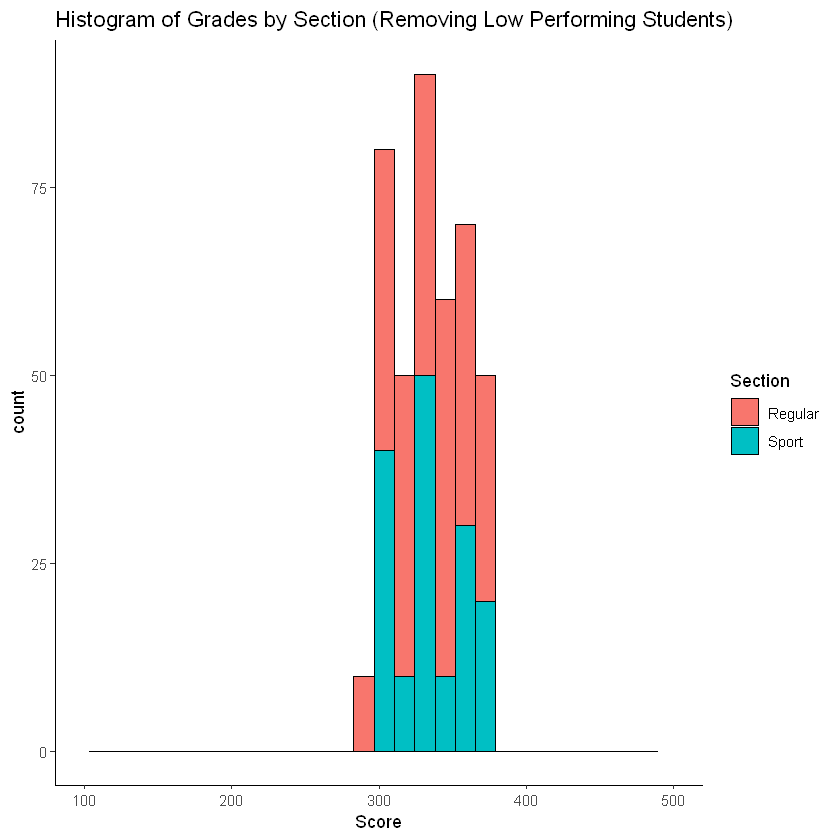

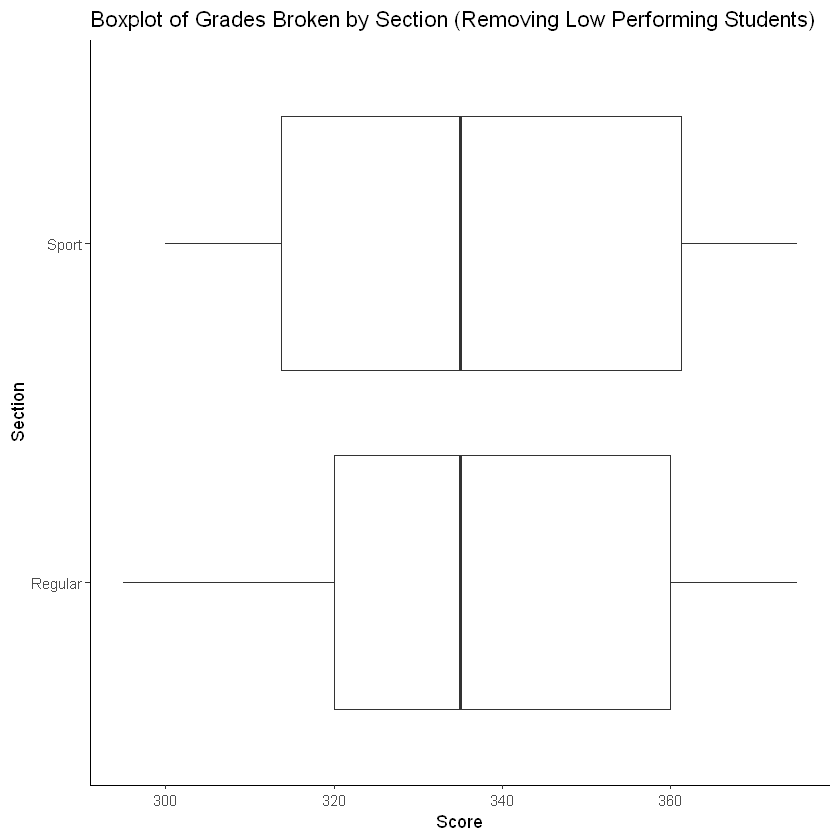

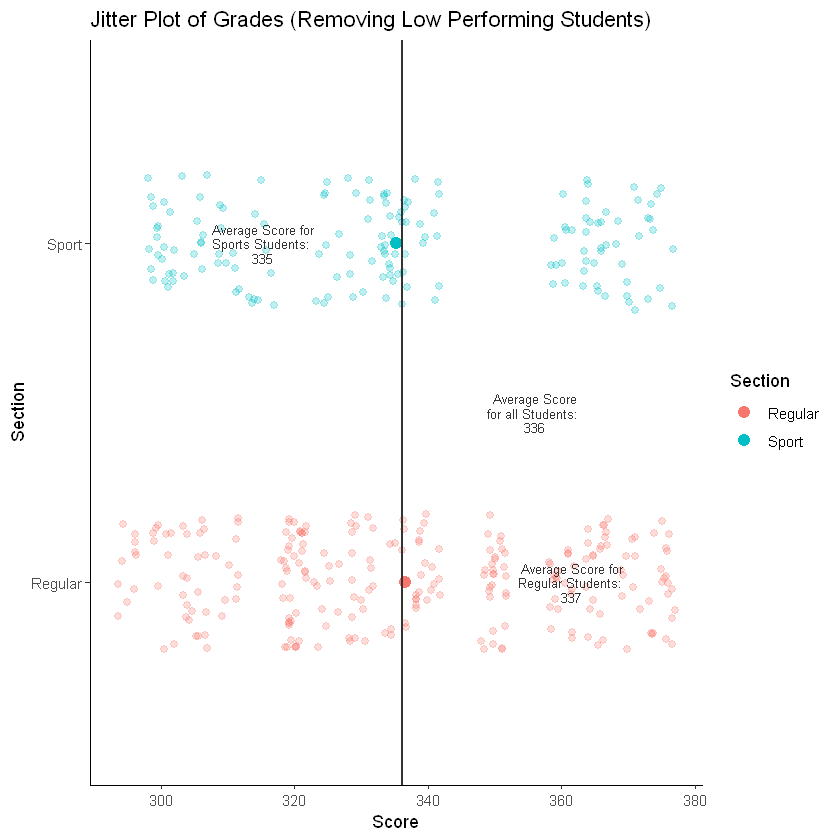

In [7]:
test_scores2 <- subset(df, Score > 285 & Score  < 380)

regular_students2 <- subset(test_scores2, !Section == "Sport")
sports_students2 <- subset(test_scores2, Section == "Sport")

summary(regular_students2)
summary(sports_students2)

average_test_score2 <- test_scores2 %>% summarize(avg = mean(Score)) %>% pull(avg)
sports_test_score2 <- sports_students2 %>% summarize(avg = mean(Score)) %>% pull(avg)
regular_test_score2<- regular_students2 %>% summarize(avg = mean(Score)) %>% pull(avg)


sports_low_scores2 <- as.numeric(count(subset(sports_students, Score < average_test_score)))
regular_low_scores2 <- as.numeric(count(subset(regular_students, Score < average_test_score)))

sports_high_scores2 <- as.numeric(count(subset(sports_students, Score > average_test_score)))
regular_high_scores2 <- as.numeric(count(subset(regular_students, Score > average_test_score)))

ggplot(data = test_scores2, aes(x = Score, fill = Section)) + 
geom_density(alpha = 0.2) + 
xlim(100,500) + 
ggtitle("Kernal Distribution of Grades by Section (Removing Low Performing Students)")


ggplot(data = test_scores2, aes(x = Score, fill = Section)) + 
geom_histogram(bins = 30, color = "black") + 
xlim(100,500) +
ggtitle("Histogram of Grades by Section (Removing Low Performing Students)")


ggplot(data = test_scores2, aes(x = Score, y = Section)) + 
geom_boxplot() +
ggtitle("Boxplot of Grades Broken by Section (Removing Low Performing Students)" )

ggplot(data = test_scores2, aes(x = Section, y = Score)) + 
geom_segment(aes(x = Section, xend = Section, y = mean(Score) , yend = average_test_score2), size = 2) +
geom_jitter(size =2, alpha = 0.25, width = 0.2, aes(color = Section)) +
stat_summary(fun = mean, geom = "point", size = 3, aes(color = Section)) +
geom_hline(aes(yintercept = average_test_score2), color = "gray20", size = 0.6) +
coord_flip() + 
annotate("text", x = 1.5, y = average_test_score2 + 20, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("Average Score\n for all Students: \n {round(average_test_score2)}")) + 
annotate("text", x = 2, y = sports_test_score2 - 20, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("Average Score for\n Sports Students: \n {round(sports_test_score2)}")) + 
annotate("text", x = 1, y = regular_test_score2 + 25, size = 2.8, color = "grey20", lineheight = 0.9, label = glue::glue("Average Score for\n Regular Students: \n {round(regular_test_score2)}")) + 
ggtitle("Jitter Plot of Grades (Removing Low Performing Students)")

Not all students are equal. In this case, we cannot draw a conclusive decision whether or not these students in the sports focused class were able to achieve similar scores to students in the regular class due to the class structure or due to other unknown variables. It's possible that, due to the student inclination to take the sports based class, they were more occupied with extracurricular sports and were unable to study as much as the students in the Regular class. If we were able to add attributes to our dataset based on whether or not a student was enrolled in an extracurricular activity, we may be able to pinpoint the reasoning behind the poor score results.


In [2]:
test_scores

Count,Score,Section
<int>,<int>,<fct>
10,200,Sports
10,205,Sports
20,235,Sports
10,240,Sports
10,250,Sports
10,265,Regular
10,275,Regular
30,285,Sports
10,295,Regular
